<a href="https://colab.research.google.com/github/SiddharthDNathan/Differentiated-Thyroid-Cancer-Recurrence/blob/main/Differentiated_Thyroid_Cancer_Recurrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Differentiated Thyroid Cancer Recurrence

This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

Subject Area - Health and Medicine

Associated Task - Classification



### **Introduction**

Differentiated thyroid cancer (DTC) is the most common type of thyroid cancer, accounting for over 90% of cases. It encompasses two main histological subtypes: papillary and follicular thyroid cancer. While the prognosis for DTC is generally favorable, with high survival rates, recurrence remains a significant concern. Predicting recurrence is crucial for patient management and treatment planning.

This project aims to develop a classification model to predict the recurrence of well-differentiated thyroid cancer using a dataset containing 13 clinicopathologic features. The dataset includes information collected over 15 years, with each patient being followed for at least 10 years. The primary objective is to evaluate different machine learning models and determine which model best predicts recurrence, thereby aiding in more effective patient management.

In [ ]:
!pip install category_encoders

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report

## **Data Cleaning & Preprocessing**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSV Files/Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df.shape

(383, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
df.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
for i in df.columns:
  print(i,df[i].unique())

Age [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Gender ['F' 'M']
Smoking ['No' 'Yes']
Hx Smoking ['No' 'Yes']
Hx Radiothreapy ['No' 'Yes']
Thyroid Function ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical Examination ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Focality ['Uni-Focal' 'Multi-Focal']
Risk ['Low' 'Intermediate' 'High']
T ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N ['N0' 'N1b' 'N1a']
M ['M0' 'M1']
Stage ['I' 'II' 'IVB' 'III' 'IVA']
Response ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
Recurred ['No' 'Y

In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
32,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
66,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
77,29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
120,37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
121,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
123,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
132,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


In [ ]:
duplicate_rows.shape

(19, 17)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred


## **Label Encoding**

In [ ]:
list(df.columns)

['Age',
 'Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response',
 'Recurred']

In [ ]:
df['Recurred'] = (df['Recurred']== 'Yes').astype(int)

In [ ]:
cols_to_encode = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy','Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M','Stage','Response']
label_encoder = ce.OrdinalEncoder(cols = cols_to_encode)
df_label_encoded = label_encoder.fit_transform(df)

In [ ]:
df_label_encoded.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,34,1,1,2,1,1,2,1,1,1,1,1,1,1,1,2,0
2,30,1,1,1,1,1,3,1,1,1,1,1,1,1,1,2,0
3,62,1,1,1,1,1,3,1,1,1,1,1,1,1,1,2,0
4,62,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,0


In [ ]:
for i in df_label_encoded.columns:
  print(i,df_label_encoded[i].unique())

Age [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Gender [1 2]
Smoking [1 2]
Hx Smoking [1 2]
Hx Radiothreapy [1 2]
Thyroid Function [1 2 3 4 5]
Physical Examination [1 2 3 4 5]
Adenopathy [1 2 3 4 5 6]
Pathology [1 2 3 4]
Focality [1 2]
Risk [1 2 3]
T [1 2 3 4 5 6 7]
N [1 2 3]
M [1 2]
Stage [1 2 3 4 5]
Response [1 2 3 4]
Recurred [0 1]


## **Basic EDA**

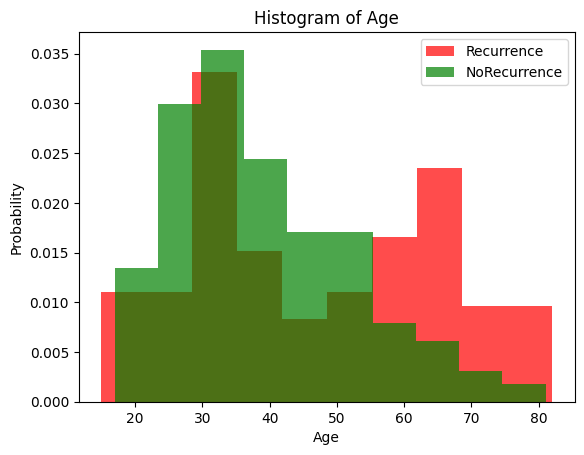

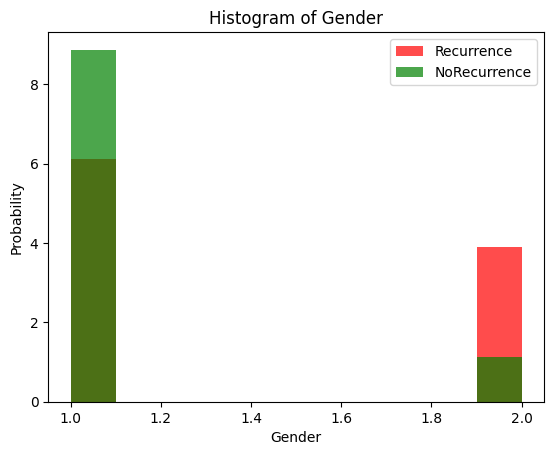

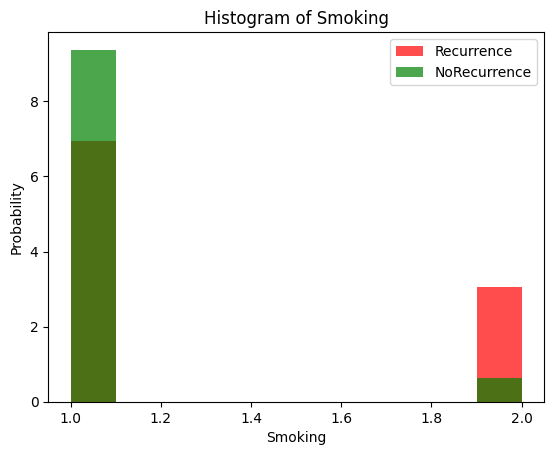

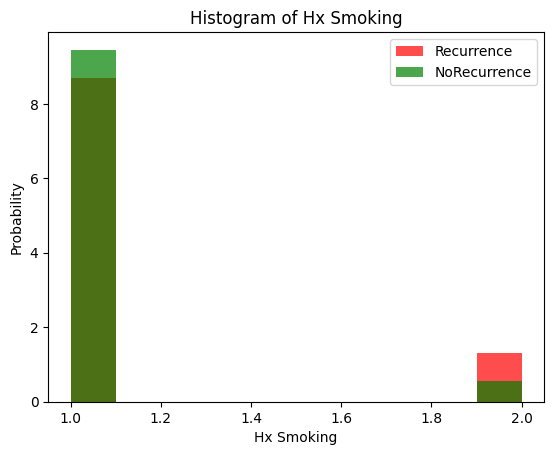

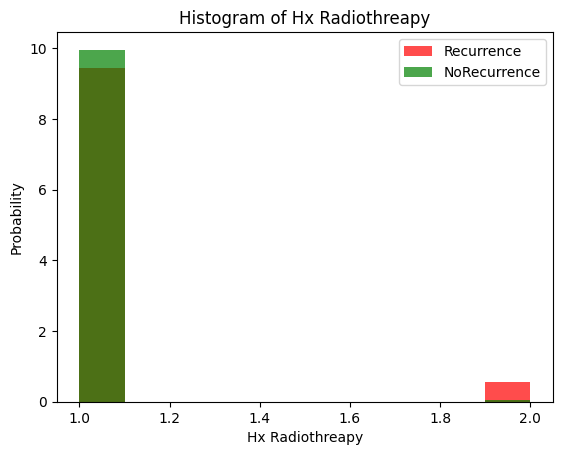

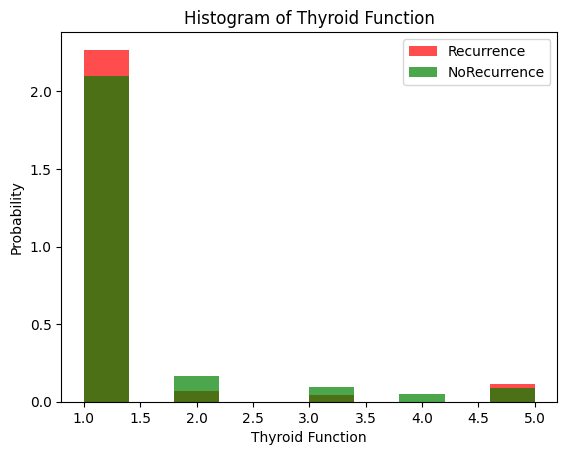

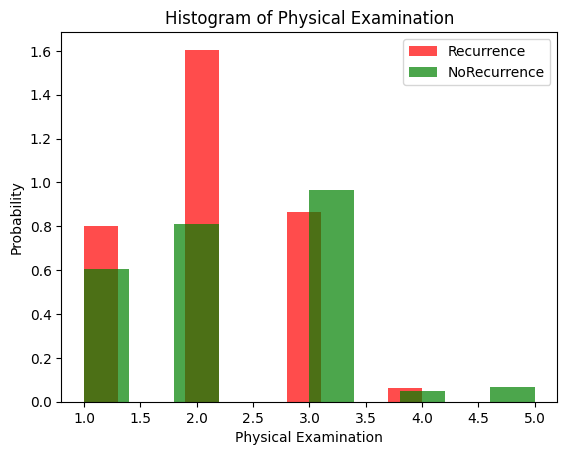

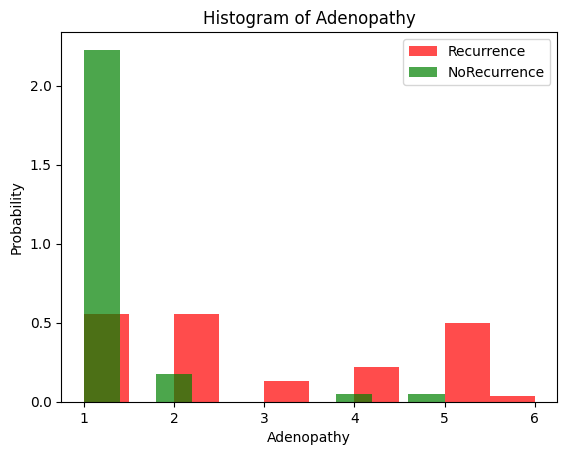

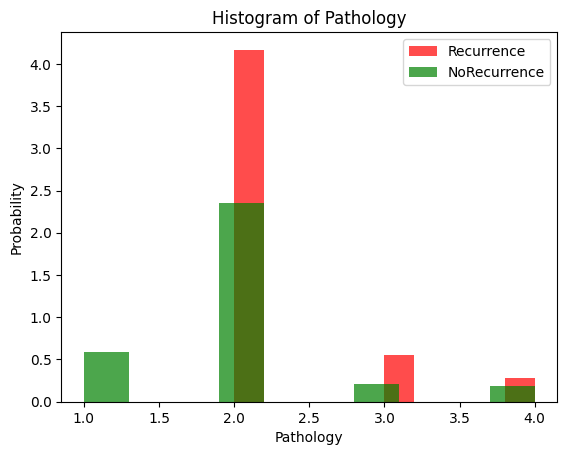

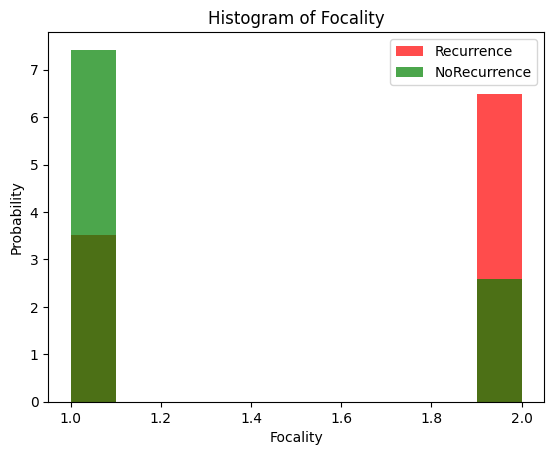

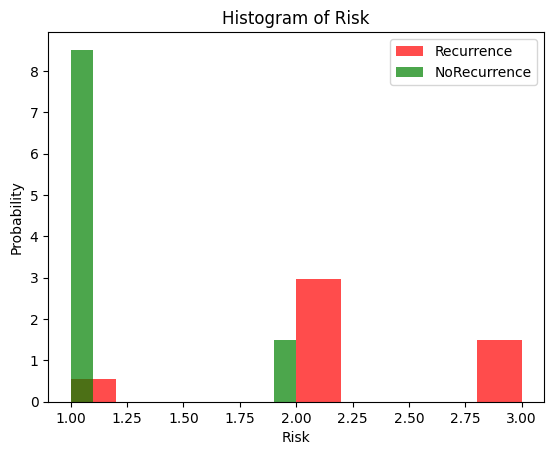

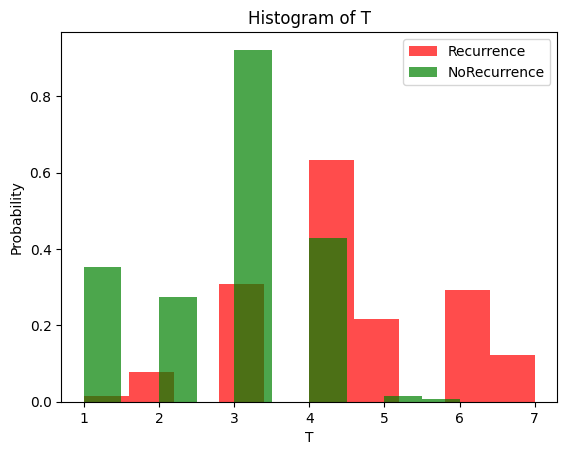

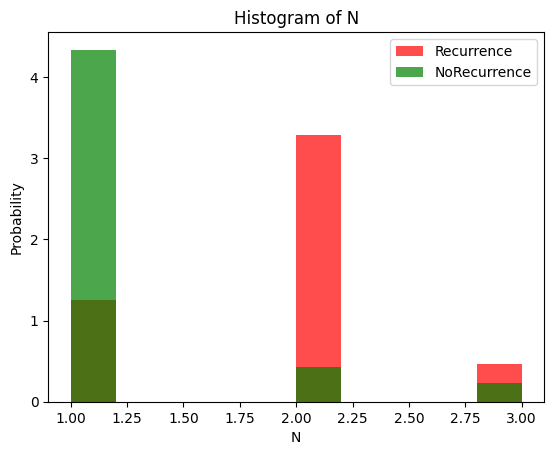

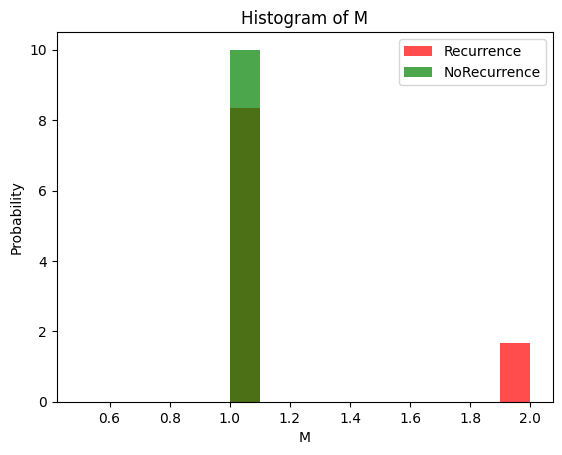

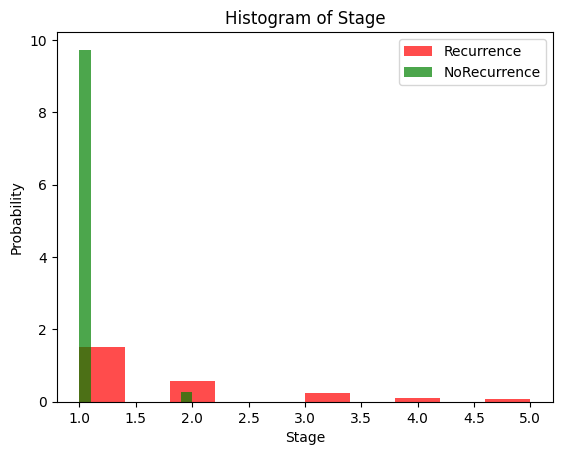

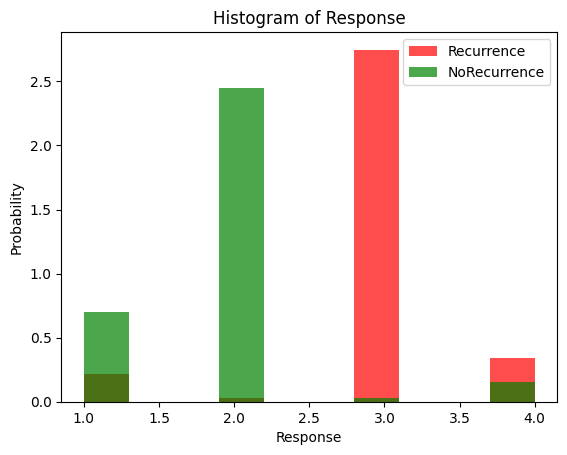

In [ ]:
cols = df_label_encoded.columns[:-1]
for label in cols:
    plt.hist(df_label_encoded[df_label_encoded['Recurred'] == 1][label], color='red', label='Recurrence', alpha=0.7, density=True)
    plt.hist(df_label_encoded[df_label_encoded['Recurred'] == 0][label], color='green', label='NoRecurrence', alpha=0.7, density=True)
    plt.title(f'Histogram of {label}')
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

## Feature Engineering

In [ ]:
df_label_encoded['Recurred'].value_counts()

Recurred
0    256
1    108
Name: count, dtype: int64

In [ ]:
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df_label_encoded.iloc[:,0:-1], df_label_encoded['Recurred'])

print('Original dataset shape', len(df_label_encoded))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 364
Resampled dataset shape 512


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Model Development and Evaluation**

# **Logistic Regression**

In [ ]:
log_model = LogisticRegression( penalty='l2')
log_model.fit(X_train_scaled, y_train)

# Initialize K-Fold cross-validator
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')

# Calculate average score
avg_score = np.mean(cv_scores)

# Print scores
print("Cross-validation scores on training set:", cv_scores)
print("Average Score on training set:", avg_score)

# Now, evaluate the model on the separate test set
log_model.fit(X_train_scaled, y_train)
test_score = log_model.score(X_test_scaled, y_test)
print("Test set accuracy:", test_score)

Cross-validation scores on training set: [0.91463415 0.85365854 0.82926829 0.8902439  0.91358025]
Average Score on training set: 0.8802770249924722
Test set accuracy: 0.9223300970873787


In [ ]:
y_pred = log_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.96      0.88      0.91        49

    accuracy                           0.92       103
   macro avg       0.93      0.92      0.92       103
weighted avg       0.92      0.92      0.92       103



In [ ]:
train_preds = log_model.predict_proba(X_train_scaled)
test_preds = log_model.predict_proba(X_test_scaled)

In [ ]:
from sklearn.metrics import log_loss
test_log_loss = log_loss(y_test,test_preds[:,1])
print("The log_loss score on test data is ", test_log_loss)

The log_loss score on test data is  0.18491781774170218


In [ ]:
from sklearn.metrics import roc_auc_score
test_roc_auc_score = roc_auc_score(y_test,test_preds[:,1])
print("The roc_auc_score on test data is ", test_roc_auc_score)

The roc_auc_score on test data is  0.9841269841269842


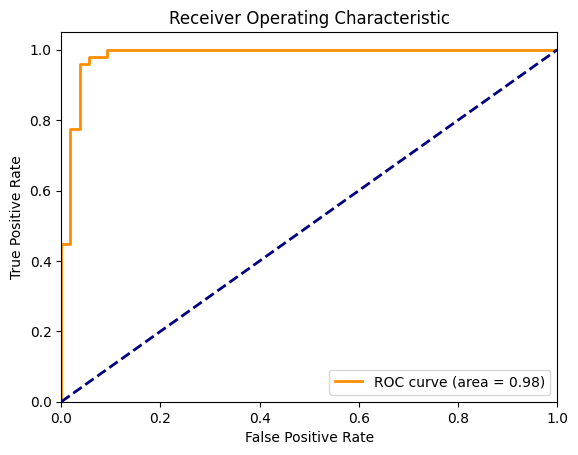

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, test_preds[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.98      0.96      0.97        49

    accuracy                           0.97       103
   macro avg       0.97      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train_scaled, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.92      0.98      0.95        49

    accuracy                           0.95       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.95      0.95      0.95       103



In [ ]:
roc_auc_score(y_test,y_pred_decision_tree)

0.9527588813303098

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(X_train_scaled, y_train)
y_pred_forest_tree = classifier.predict(X_test_scaled)

print(classification_report(y_test, y_pred_forest_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        49

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [ ]:
roc_auc_score(y_test,y_pred_forest_tree)

1.0

# Report

**Data Description and Preprocessing**

The dataset consists of 383 entries and 17 columns, covering various clinical and pathological features such as age, gender, smoking history, thyroid function, pathology, and recurrence status. The initial exploration revealed no missing values, but 19 duplicate entries were identified and removed, resulting in 364 unique entries.

Categorical variables were label encoded using the category_encoders library to convert them into numerical form suitable for machine learning algorithms. Given the imbalance in the target variable (Recurred), where the majority class was 'No', we applied Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes.
Exploratory Data Analysis

Histograms were plotted for each feature, comparing the distributions between patients with recurrence and without recurrence. These visualizations provided initial insights into the data, although additional plots such as correlation heatmaps and pair plots could have offered deeper understanding.
Feature Engineering

Feature scaling was performed using StandardScaler to normalize the data, ensuring that features contributed equally to the model training process. While SMOTE was used to address class imbalance, future work could consider advanced feature selection techniques to enhance the model further.

**Model Development and Evaluation**

Four machine learning models were developed and evaluated:

    **Logistic Regression:**
        Cross-validation accuracy on the training set: 88.03%
        Test set accuracy: 92.23%
        ROC AUC score: 0.9841
        Log loss: 0.1849
        Classification Report:
            Precision: 0.96 (Yes), 0.90 (No)
            Recall: 0.88 (Yes), 0.96 (No)
            F1-score: 0.91 (Yes), 0.93 (No)

    **K-Nearest Neighbors (KNN):**
        Test set accuracy: 96.12%
        Classification Report:
            Precision: 0.98 (Yes), 0.96 (No)
            Recall: 0.96 (Yes), 0.98 (No)
            F1-score: 0.97 (Yes), 0.97 (No)

    **Decision Tree:**
        Test set accuracy: 95.15%
        Classification Report:
            Precision: 0.92 (Yes), 0.98 (No)
            Recall: 0.98 (Yes), 0.93 (No)
            F1-score: 0.95 (Yes), 0.95 (No)
        ROC AUC score: 0.9528

    **Random Forest:**
        Test set accuracy: 100%
        Classification Report:
            Precision, Recall, and F1-score: 1.00 (for both classes)
        ROC AUC score: 1.00

## Results

The Random Forest classifier demonstrated perfect performance on the test set, with an accuracy, precision, recall, and F1-score of 100%. However, such perfect results may suggest overfitting, and further validation on a separate dataset would be necessary to confirm its generalizability. Logistic Regression and KNN also performed well, with high accuracy and robust classification metrics. The Decision Tree, while effective, was slightly less accurate than the other models.

### Conclusion

This project successfully developed and evaluated multiple models for predicting the recurrence of well-differentiated thyroid cancer. The Random Forest model achieved perfect classification metrics, though its generalizability requires further validation. Logistic Regression and KNN models also showed strong performance, making them viable alternatives.

Future work should focus on enhancing feature engineering, exploring additional models, and validating the models on external datasets to ensure robustness and generalizability. These models have the potential to significantly aid clinicians in predicting thyroid cancer recurrence, leading to better-informed treatment decisions and improved patient outcomes.